Arturo Fornes (A01227071)

Gerardo Juarez (A00226860)

Miguel Montoya (A01226045)

David Arana (A01630076)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Details


### You have the following information in your files
- "agents.csv" and
- "properties.csv"


- PROPERTIES table: 
  - **id**(PK, INT) - unique identification number of the property ad listing
  - **title**(VARCHAR) - title of the property ad listing
  - **features**(VARCHAR) - field with additional characteristics of the property ad listing
  - **living_area**(FLOAT) - living area of the property in square meters
  - **total_area**(FLOAT)- total area of the property in square meters
   - **plot_area**(FLOAT) - plot area of the property in square meters
  - **price**(FLOAT) - selling price of the property in euros
  - **agent_id**(INT) - selling agent id
  - **createdAt**(DATE) - date in which the property was added to the market
- AGENTS table: 
  - **agent_id**(PK, INT) - selling agent id
  - **company**(VARCHAR) - company for which the agent works

#### Details of properties:
- **locations** can be: Alenquer, Quinta da Marinha, Golden Mile, Nagüeles;
- **types** can be: ‘apartment’, ‘penthouse’, ‘duplex’, ‘house’, ‘villa’, ‘country estate’,
‘moradia', ‘quinta', ‘plot’, ‘land’; 
- the property types can be part of the following **property groups**:
  1. group **‘apartments’** includes types ‘apartment’, ‘penthouse’, ‘duplex’;
  2. group **‘‘houses’**‘ includes types ‘house’, ‘villa’, ‘country estate’, ‘moradia', ‘quinta’;
  3. group **‘‘plots’**‘ includes types ’plot’, ‘land’.
- areas:
 - for the group **‘plots’** use **plot_area**;
 - for groups **‘apartments’** and **‘houses’** use the highest value between **total_area** or **living_area**;



**challenge**
- (Q6) Write a code to identify companies (agents) with most expensive properties for each month in 2017
- (Q7) Write a code to get first and last property posted by each company (agents)

# Data Analysis (Python)

 For this part, feel free to use as many cells as you need below this point. Please use properties.csv as your data source. 



## Problem 
A private investor is planning an investment in one of the four locations. In order to decide where to invest he needs to know the price impact of such features as ‘pool’, ‘sea view’ and ‘garage’ on properties in each location.
He also asks for the mean price of the properties in each type group (‘apartments’, ‘houses’, ‘plots’) and wants to know about properties in the market that are undervalued and overvalued. In order to accomplish the problem that was described we want you to cover the following steps:

#### Part 1: Data Cleaning
As you have seen previously, a lot of information is present in the title/features fields. From there, we want to extract the relevant information for further analysis, such as:
 - 1A: Property  **type** (as presented in **Details** above, of each property from **title** field
 - 1B: Property **location** (as presented in **Details** above, of each property from ** title** field
 - 1C: From ** features** field, if a property has:
  - a pool
  - a garage
  - sea view

#### Expected Outcome for Part 1:
- Create a property dataset with the following schema and save it in a csv file:
  - id; 
  - location name
  - type
  - title
  - features
  - pool (0/1)
  - sea view (0/1)
  - garage (0/1)
- Pool, sea view and garage should be binary:1 if the property has the feature and 0 if not
- For each of the 3 tasks (1A, 1B, 1C), describe in detail the what you did.
-  Please provide your code in the cells below, in a reproducible and understandable way;

In [2]:
locations = ["Alenquer", "Quinta da Marinha", "Golden Mile", "Nagüeles", "Nagueles"]
types = {"apartment":"apartments", "penthouse":"apartments", "duplex":"apartments",
         "residence":"houses", "house":"houses", "villa":"houses", "country estate":"houses", "estate":"houses", "moradia":"houses", "quinta":"houses",
         "plot":"plots", "land":"plots"}

agents = pd.read_csv("agents.csv")
properties = pd.read_csv("properties.csv")

def funcLoc(title):
    for loc in locations:
        if loc.lower() in title.lower():
            if loc == "Nagueles":
                    return "Nagüeles"
            return loc

    
def funcTypes(title):
    for typ in types:
        if typ.lower() in title.lower():
            return types[typ]    
        
def funcPool(feature):
    if type(feature) != type(""):
        return 0
    elif "pool" in feature.lower():
        return 1
    return 0

def funcSea(feature):
    if type(feature) != type(""):
        return 0
    elif "sea view" in feature.lower():
        return 1
    return 0

def funcGarage(feature):
    if type(feature) != type(""):
        return 0
    elif "garage" in feature.lower():
        return 1
    return 0
        
properties["location"] = properties["title"].map(funcLoc)
properties["type"] = properties["title"].map(funcTypes)
properties["pool"] = properties["features"].map(funcPool)
properties["sea_view"] = properties["features"].map(funcSea)
properties["garage"] = properties["features"].map(funcGarage)

properties.to_csv("great_properties.csv")

#### Part 2: Identify outliers
Now that the data is structured correctly, let's look at which properties are a  good deal for our investor. For this you will need to** identify undervalued, overvalued, and normal properties** in the dataset. Remember that a  undervalued house in one location can be considered a high outlier in another location. Location and type classifications are important in this task.
#### Expected Outcome for Part 2:
- As before, deliver a csv file with the following format:
  - id
  - location name
  - type
  - area
  - price
  - over-valued (0/1)
  - under-valued (0/1)
  - normal (0/1)
- the new columns should be binary, where for example **over-valued** column would get value 1 if the property is indeed over-valued, 0 otherwise;
- A short report (could be a pdf file or new cells within the notebook) containing:
  - visualizations (such as scatter plots) discriminating between the undervalued, overvalued and normal properties.
  - a explanation of what is the difference between under-valued/over-valued properties and pure data outliers;
  - any notes/conclusions you wish to add;
- Provide your code in a reproducible way in the cells below;

In [3]:
properties["area"] = [row["plot_area"] if row["type"] == "plots" else max(0 if np.isnan(row["living_area"]) else row["living_area"], 0 if np.isnan(row["total_area"]) else row["total_area"]) for i, row in properties.iterrows()]

print(properties.groupby(['location', 'type'])['price'].quantile(0.25))
print(properties.groupby(['location', 'type'])['price'].quantile(0.75))


location           type      
Alenquer           apartments      61500.0
                   houses          79000.0
                   plots           65500.0
Golden Mile        apartments     310000.0
                   houses         450000.0
                   plots          550000.0
Nagüeles           apartments     265000.0
                   houses         465000.0
                   plots          968750.0
Quinta da Marinha  apartments     995000.0
                   houses        1000000.0
Name: price, dtype: float64
location           type      
Alenquer           apartments      93600.0
                   houses         260000.0
                   plots          197450.0
Golden Mile        apartments     900000.0
                   houses        2461000.0
                   plots         3640000.0
Nagüeles           apartments     475000.0
                   houses        1550000.0
                   plots         4200000.0
Quinta da Marinha  apartments    1481232.0
         

In [4]:
q1_dict = {
    'Alenquer': {'apartments': 61500, 'houses': 79000, 'plots': 65500},
    'Golden Mile': {'apartments': 310000, 'houses': 450000, 'plots': 550000},
    'Nagüeles': {'apartments': 265000, 'houses': 465000, 'plots':968750},
    'Quinta da Marinha': {'apartments': 995000, 'houses': 1000000}
}
q3_dict = {
    'Alenquer': {'apartments': 93600, 'houses': 260000, 'plots': 197450},
    'Golden Mile': {'apartments': 900000, 'houses': 2461000, 'plots': 3640000},
    'Nagüeles': {'apartments': 475000, 'houses': 1550000, 'plots': 4200000},
    'Quinta da Marinha': {'apartments': 1481232, 'houses': 3137938}
}

# inner out = q1 - 1.5*IQ
# outer out = q3 + 1.5+IQ
properties["over-valued"] = [1 if row["price"] >= q3_dict[row.location][row.type] + 1.5 * (q3_dict[row.location][row.type] - q1_dict[row.location][row.type]) 
                             else 0
                             for i, row in properties.iterrows()]
properties["under-valued"] = [1 if row["price"] <= q1_dict[row.location][row.type] - 1.5 * (q3_dict[row.location][row.type] - q1_dict[row.location][row.type]) 
                             else 0
                             for i, row in properties.iterrows()]
properties["normal"] = [0 if row["over-valued"] == 1 or row["under-valued"] == 1 
                        else 1 for i, row in properties.iterrows()]

In [5]:
properties.to_csv("price_properties.csv")

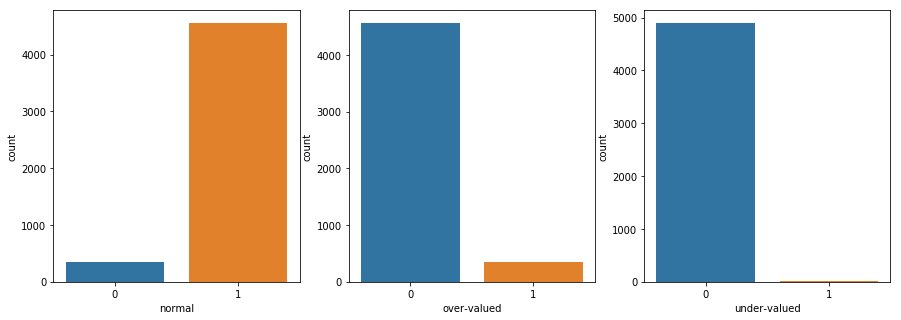

In [6]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.countplot(properties['normal'], ax = ax1)
sns.countplot(properties['over-valued'], ax = ax2)
sns.countplot(properties['under-valued'], ax = ax3)


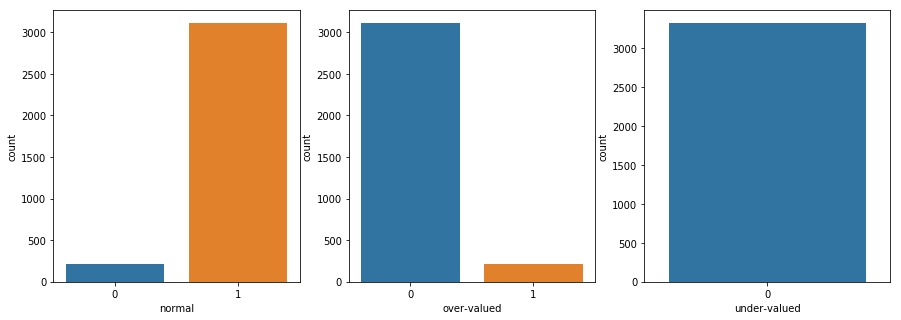

In [7]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.countplot(properties[properties.type=='houses']['normal'], ax = ax1)
sns.countplot(properties[properties.type=='houses']['over-valued'], ax = ax2)
sns.countplot(properties[properties.type=='houses']['under-valued'], ax = ax3)


/Users/fornesarturo/anaconda3/envs/ds/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


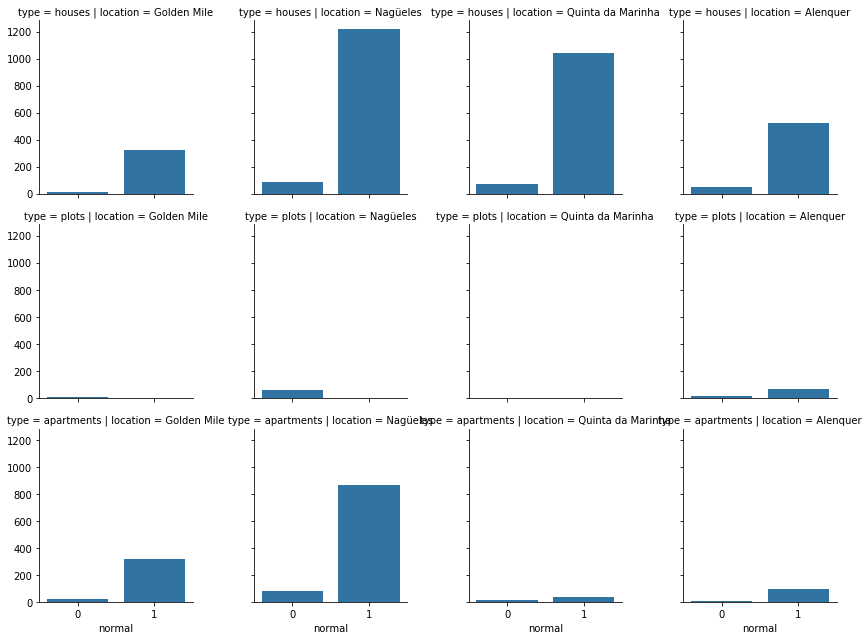

In [8]:
g = sns.FacetGrid(properties, row='type', col='location')
g.map(sns.countplot, 'normal')

/Users/fornesarturo/anaconda3/envs/ds/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


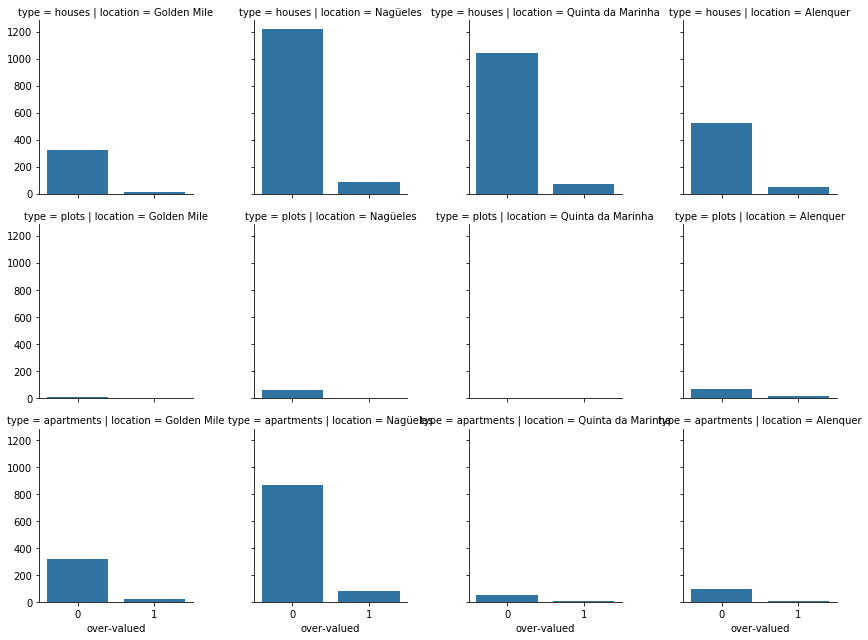

In [9]:
g = sns.FacetGrid(properties, row='type', col='location')
g.map(sns.countplot, 'over-valued')

/Users/fornesarturo/anaconda3/envs/ds/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


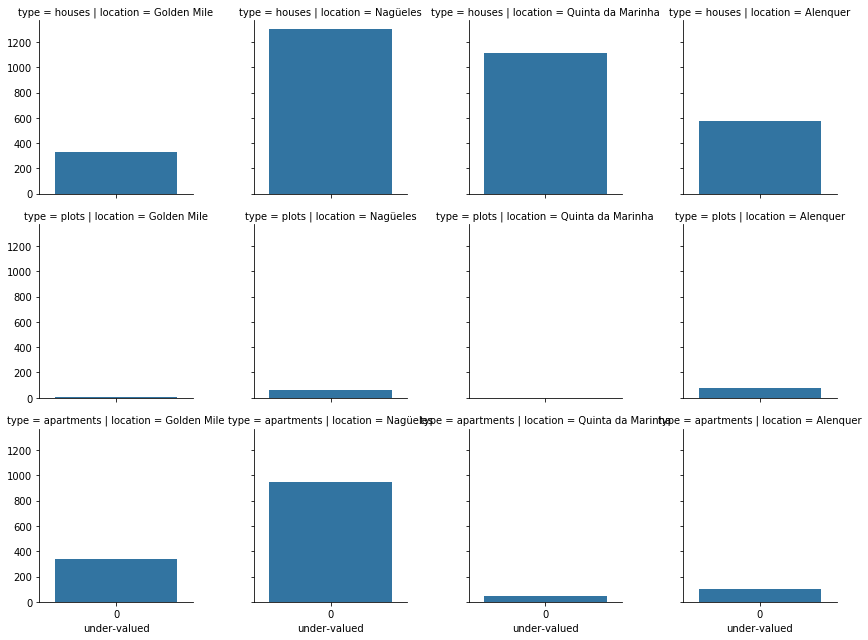

In [10]:
g = sns.FacetGrid(properties, row='type', col='location')
g.map(sns.countplot, 'under-valued')

#### Part 3: Theoretical questions

- Describe in detail how you would evaluate the price impact of features such as sea view, pool and garage considering the dataset provided. Your answer should also include how would you deal with missing values, outliers and duplicated listings (same property listing published by different agencies);


Con la matriz de correlación, se podría realizar un prefiltrado de los datos según los outliers que te gustaría evitar y quitar los valores vacíos y ya sobre ese dataset filtrado hacer la matriz de correlación. 

Para las entradas duplicadas se nos ocurren dos: en una se tendría que manejar eso desde antes, igual con un prefiltrado, sería buscar que la descripción textual y los atributos que separamos sean, lo primero muy parecido, y lo segundo idéntico; la otra es hacer cualquier análisis de correlación por agencia, para evitar inflar los resultados con las repeticiones.

#### Part 4: Create a model to estimate the price of the properties based on the features you consider. You can use linear, polynomial, multivariate or tree regressors. 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

y = properties["price"]
X = properties[["pool", "sea_view", "garage", "area"]]


polynomial_feat = PolynomialFeatures(4)
x_poly = polynomial_feat.fit_transform(X)


x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=0)


regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
print("Mean absolute error: %.2f"% mean_absolute_error(y_test, regression.predict(x_test)))
print("Mean squared error: %.2f"% mean_squared_error(y_test, regression.predict(x_test)))
print('Variance score: %.2f' % r2_score(y_test, regression.predict(x_test)))

Mean absolute error: 1189884.15
Mean squared error: 4680108198393.74
Variance score: -0.02


In [17]:
from sklearn.svm import SVR

svr_regressor = SVR()
svr_regressor.fit(x_train, y_train)

/Users/fornesarturo/anaconda3/envs/ds/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
svr_y_predicted = svr_regressor.predict(x_test)
svr_y_predicted

array([547015.        , 547013.        , 547013.        , 547015.        ,
       547014.        , 547010.        , 546996.        , 547095.8477596 ,
       547016.        , 547014.        , 547014.        , 547003.        ,
       547013.        , 547016.        , 547011.        , 547013.        ,
       547012.        , 547015.        , 547015.        , 547018.        ,
       547014.        , 547017.        , 547011.        , 547005.        ,
       547095.8477596 , 547095.8477596 , 547017.        , 547015.        ,
       547018.        , 547015.        , 547005.        , 547095.8477596 ,
       547014.        , 547014.        , 547028.        , 547012.        ,
       547095.8477596 , 547013.        , 547011.        , 547014.        ,
       547016.        , 547014.        , 547007.        , 547005.        ,
       547025.        , 547014.        , 547008.        , 547026.        ,
       547017.        , 547019.        , 547014.        , 547013.        ,
       547012.        , 5

In [19]:
print("Mean absolute error: %.2f"% mean_absolute_error(y_test, svr_y_predicted))
print("Mean squared error: %.2f"% mean_squared_error(y_test, svr_y_predicted))
print('Variance score: %.2f' % r2_score(y_test, svr_y_predicted))

Mean absolute error: 1070050.38
Mean squared error: 5261838540157.18
Variance score: -0.14


In [20]:
from sklearn.ensemble import RandomForestRegressor

rforest_regressor = RandomForestRegressor(n_estimators=10)

In [21]:
rforest_regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
r_forest_predictions = rforest_regressor.predict(x_test)
r_forest_predictions

array([ 1475000.        ,   195388.72100122,   592347.67857143,
        5280000.        ,    86700.        ,   505347.09055944,
         354911.40420714,  2372911.32905248,  7592000.        ,
        6340000.        ,   562700.        ,   542672.04352901,
         903000.        ,  1423682.44949495,   220000.        ,
         763427.47916667,   395871.41428571,  1808771.42857143,
        3780000.        ,  3202687.25718726,   250942.56715507,
        5500000.        ,   165737.5       ,   176846.68803419,
        2372911.32905248,  2372911.32905248,  1298877.38095238,
        2410000.        ,  2414626.98412698,   810056.82539683,
         176846.68803419,  2372911.32905248,   393000.        ,
        2397987.63736264,   861434.41790371,   356800.        ,
        2372911.32905248,   424750.        ,   455000.        ,
         652500.        ,  1735500.        ,  1400719.04761905,
         273080.        ,   176846.68803419,  1706313.56837607,
         136286.81818182,   131418.88888

In [24]:
print("Mean absolute error: %.2f"% mean_absolute_error(y_test, r_forest_predictions))
print("Mean squared error: %.2f"% mean_squared_error(y_test, r_forest_predictions))
print('Variance score: %.2f' % r2_score(y_test, r_forest_predictions))

Mean absolute error: 796943.20
Mean squared error: 4377375530192.54
Variance score: 0.05
